# Pymaceuticals Inc.
---

### Analysis

Three observations that can be made upon reviewing the data are:
1) For the mice recieving Capomulin, the weight of the mouse and the size of the tumor are positively correlated. They have a relatively high      correlation of 0.84.
2) The Capomulin treatment seemed to be effective at reducing the size of the tumor over time, although it did seem to have some resistence.
3) Infubinol had an outlier which could have skewed the data to some degree.
 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, how='outer', on="Mouse ID") #merge datasets into single Dataframe

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [38]:
# Checking the number of mice.
number_of_mice = len(mouse_study_df["Mouse ID"].unique()) #number of mice in the original combined dataframe
number_of_mice

249

In [39]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
  
duplicated_mice = mouse_study_df[mouse_study_df[["Mouse ID", "Timepoint"]].duplicated() == True] #xpert was used here to assist with the duplicated function

duplicated_mice_ids = duplicated_mice["Mouse ID"].unique()  #find the duplicated mouse

duplicated_mice_ids




array(['g989'], dtype=object)

In [40]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_id_data = mouse_study_df.loc[mouse_study_df["Mouse ID"]== "g989"]
duplicated_id_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_cleaned = mouse_study_df.drop(mouse_study_df[mouse_study_df["Mouse ID"] == "g989"].index) #This website helped with this code https://saturncloud.io/blog/how-to-remove-rows-with-specific-values-in-pandas-dataframe/#:~:text=Another%20method%20to%20remove%20rows,value%20we%20want%20to%20remove.

mouse_study_cleaned.head()  #dropped the duplicated mouse and created a cleaned dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [42]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = len(mouse_study_cleaned["Mouse ID"].unique())
number_of_mice_cleaned

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_summary = mouse_study_cleaned.set_index("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = regimen_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = regimen_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var = regimen_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_stdev = regimen_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = regimen_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
regimen_summary_df = pd.DataFrame({"Mean Tumor Volume": regimen_mean, "Median Tumor Volume": regimen_median, "Tumor Volume Variance": regimen_var,
                                   "Tumor Volume Std. Dev.": regimen_stdev, "Tumor Volume Std. Err.": regimen_sem})

regimen_summary_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_agg = regimen_summary.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
regimen_summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

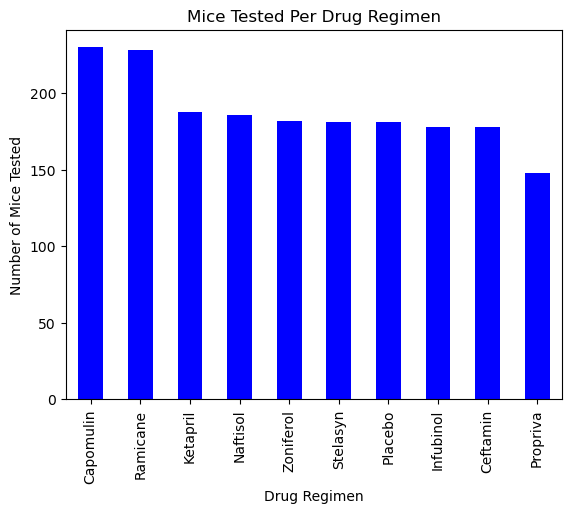

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_regimen = mouse_study_cleaned[["Drug Regimen", "Timepoint"]]
mice_per_regimen = mice_regimen["Drug Regimen"].value_counts()

mice_per_regimen.plot(kind="bar",color = "blue",
                  xlabel= "Drug Regimen",
                  ylabel="Number of Mice Tested",
                  title= "Mice Tested Per Drug Regimen")
plt.show()


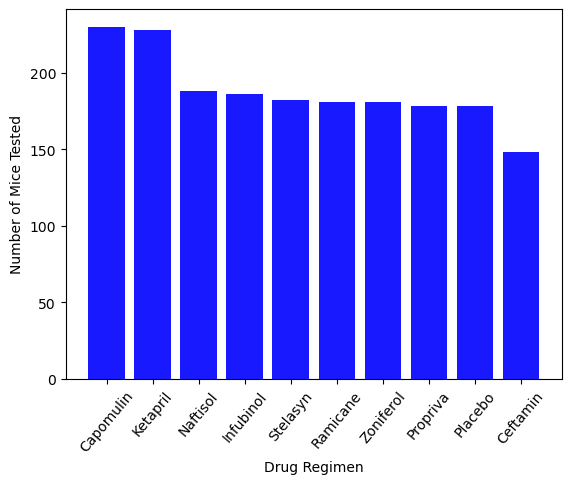

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_study_cleaned["Drug Regimen"].unique()
y_axis = mouse_study_cleaned["Drug Regimen"].value_counts()

plt.bar(x_axis, y_axis, color="blue", alpha=0.9, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_study_cleaned["Drug Regimen"].unique(), rotation=50)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

plt.show()



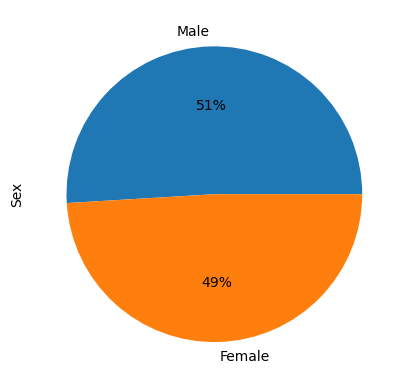

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male_mice = mouse_study_cleaned["Sex"].value_counts()
Sex = ["Male", "Female"]
female_male_mice.plot(kind="pie", autopct="%1.0f%%", ylabel = "Sex")
plt.show()

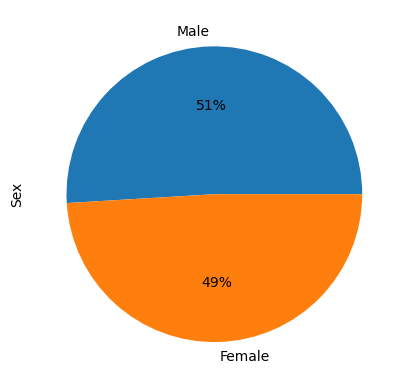

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = mouse_study_cleaned["Sex"].value_counts()
plt.ylabel("Sex")
plt.pie(sex_count, labels=sex_count.index, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_regimen = mouse_study_cleaned.loc[(mouse_study_cleaned["Drug Regimen"] == "Capomulin") | (mouse_study_cleaned["Drug Regimen"] == "Ramicane") |
                                               (mouse_study_cleaned["Drug Regimen"] == "Infubinol") | (mouse_study_cleaned["Drug Regimen"] == "Ceftamin")]


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_tumor_regimen.groupby(["Drug Regimen", "Mouse ID"]).last() #xpert assisted in figuring out the .last() function and resetting the index

reset_timepoint = last_timepoint.reset_index()  #This resets the index of the dataframe
#reset_timepoint
final_tumor = reset_timepoint[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

final_tumor
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_regimen = pd.merge(final_tumor_regimen, final_tumor[["Mouse ID", "Tumor Volume (mm3)"]] , on=["Mouse ID"], how="outer")
merged_tumor_regimen.rename(columns={"Tumor Volume (mm3)_y": "Final Tumor Volume"}, inplace=True)
merged_tumor_regimen.head(15)

capomulin_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Capomulin"]   #I wasnt exactly sure how it wanted me to merged the dataframes so I created one named mouse_tumor_regimen
capomulin_df                                                                 #I also had to created these individual dataframes using the .loc function and combined them into regimen_df to use with the boxplot. 

ramicane_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = final_tumor.loc[final_tumor["Drug Regimen"] == "Ceftamin"]
ceftamin_df

regimen_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
          "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

#regimen_df.head()
merged_tumor_regimen.head(15)


,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,38.982878
1,b128,5,45.651331,0,Capomulin,Female,9,22,38.982878
2,b128,10,43.270852,0,Capomulin,Female,9,22,38.982878
3,b128,15,43.784893,0,Capomulin,Female,9,22,38.982878
4,b128,20,42.731552,0,Capomulin,Female,9,22,38.982878
5,b128,25,43.262145,1,Capomulin,Female,9,22,38.982878
6,b128,30,40.605335,1,Capomulin,Female,9,22,38.982878
7,b128,35,37.967644,1,Capomulin,Female,9,22,38.982878
8,b128,40,38.379726,2,Capomulin,Female,9,22,38.982878
9,b128,45,38.982878,2,Capomulin,Female,9,22,38.982878


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for regimen in merged_tumor_regimen["Drug Regimen"]:  
    if regimen not in treatment:
        treatment.append(regimen)
treatment

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
upperq_list = []
lowerq_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment:    
   
    quartiles = regimen_df[regimen].quantile([0.25,0.5,0.75]) 
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    regimen_iqr = upperq-lowerq
   
   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    print(f"IQR for {regimen}: {regimen_iqr}")

upperq_list
lowerq_list


for regimen in merged_tumor_regimen['Drug Regimen'].unique():
    regimen_subset = merged_tumor_regimen.loc[merged_tumor_regimen['Drug Regimen'] == regimen, 'Final Tumor Volume'] #xpert assisted in writing this
    quartiles = regimen_subset.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    regimen_iqr1 = upperq - lowerq

    # Calculate upper and lower bounds for potential outliers
    upper_bound = upperq + (1.5 * regimen_iqr)
    lower_bound = lowerq - (1.5 * regimen_iqr)

    print(f"For {regimen} values below {round(lower_bound, 2)} or above {round(upper_bound, 2)} could be outliers.")
    



    


IQR for Capomulin: 7.781863460000004
IQR for Infubinol: 11.477135160000003
IQR for Ramicane: 9.098536719999998
IQR for Ceftamin: 15.577752179999997
For Capomulin values below 9.01 or above 63.53 could be outliers.
For Infubinol values below 33.67 or above 89.56 could be outliers.
For Ramicane values below 7.73 or above 62.18 could be outliers.
For Ceftamin values below 36.38 or above 88.1 could be outliers.


Text(0.5, 0, '')

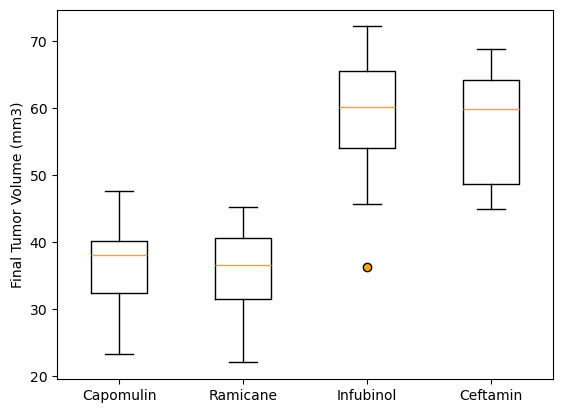

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot = regimen_df.boxplot(grid = False, flierprops=dict(marker="o", markerfacecolor="orange"), color = dict(boxes = "k", whiskers="k", medians="orange"))
#xpert was used to help format the boxplot to match the sample
boxplot.set_ylabel("Final Tumor Volume (mm3)")
boxplot.set_xlabel("")


## Line and Scatter Plots

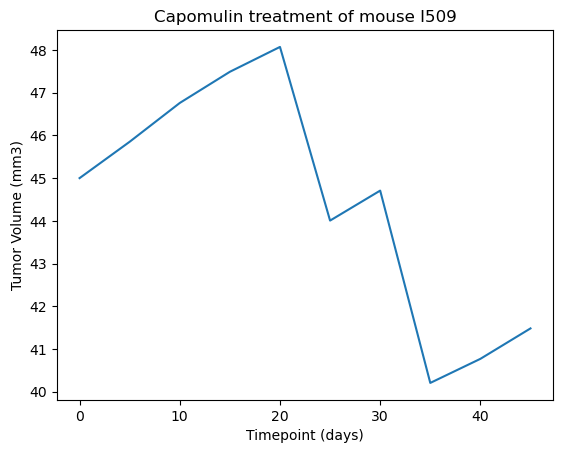

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#mouse ID l509

regimen_l509 = merged_tumor_regimen.loc[(merged_tumor_regimen["Drug Regimen"] == "Capomulin") & (merged_tumor_regimen["Mouse ID"] == "l509")]
reduced_regimen_l509 = regimen_l509[["Timepoint", "Tumor Volume (mm3)_x"]]
reduced_regimen_l509 = reduced_regimen_l509.set_index("Timepoint")

x_axis = reduced_regimen_l509.index.values
y_axis = reduced_regimen_l509.values


plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


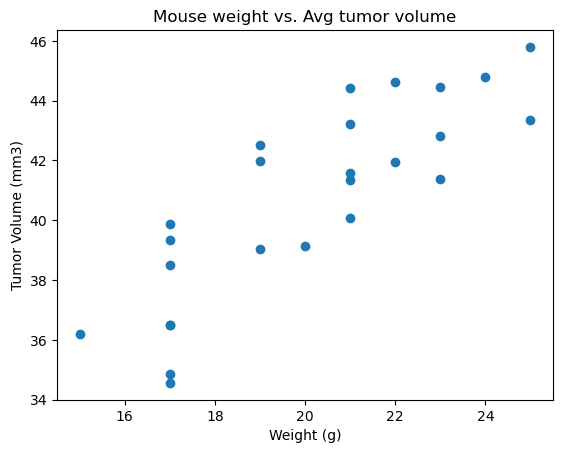

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_weight_volume = merged_tumor_regimen.loc[merged_tumor_regimen["Drug Regimen"] == "Capomulin"]
id_weight_volume = capo_weight_volume.groupby("Mouse ID")

avg_volume = id_weight_volume["Tumor Volume (mm3)_x"].mean()
avg_weight = id_weight_volume["Weight (g)"].mean()


plt.scatter(avg_weight, avg_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight vs. Avg tumor volume")

plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


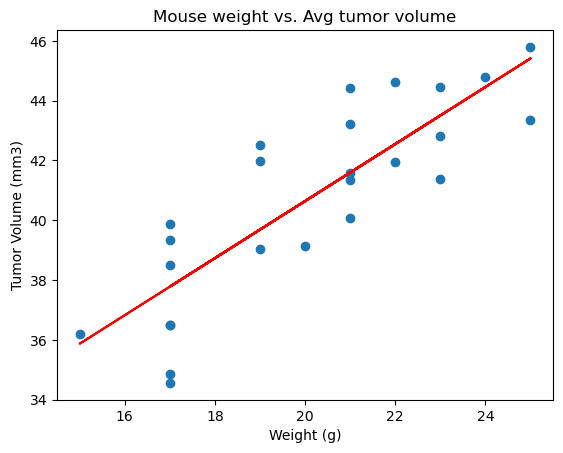

In [54]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capo_weight_volume = merged_tumor_regimen.loc[merged_tumor_regimen["Drug Regimen"] == "Capomulin"]
id_weight_volume = capo_weight_volume.groupby("Mouse ID")

avg_volume = id_weight_volume["Tumor Volume (mm3)_x"].mean()
avg_weight = id_weight_volume["Weight (g)"].mean()


plt.scatter(avg_weight, avg_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse weight vs. Avg tumor volume")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_volume)
regression = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   #from instructor regression activity in class
plt.plot(avg_weight, regression,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

correlation = st.pearsonr (avg_weight, avg_volume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

plt.show()